##       Application des règles d'association sur le  dataset movielens en utilisant python et les bibliothèque pandas et mlxtend
*Sanaa CHAOU, MBISD2, ENSAT*

### preprocesseing de la dataset movielens

*Lien du dataset sur kaggle : https://www.kaggle.com/grouplens/movielens-20m-dataset*

#### Installation du module 'mlxtend' qui permet de calculer les règles d'association*

In [28]:
!pip install mlxtend  

#### Importation des bibliothèques nécessaires 

In [30]:
import pandas as pd
from random import sample 
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

#### Chargement des données contenues dans les deux fichiers movie.csv et rating.csv

In [ ]:
movies = pd.read_csv("../movielens/movie.csv")
rating = pd.read_csv("../movielens/rating.csv")

#### Exploration des données

In [5]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


*Le fichiers movies.csv contient les données sur les filmes : id, titre et genres*

In [4]:
rating.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


*Le fichier rating.csv contient les données sur l'évaluation de chaque utilisateurs sur les différents films*

In [79]:
# Afficher le nombres de films 
movies.movieId.count()

27278

* Remarque : le nombre de films est très grand donc on va se contenter à étudier les règles d'association pour 100 films les plus vus


#### Afficher le nombres de vues (utilisateurs) pour chaque film afin de réduire nos données cibles et réstreindre l'étude sur les 100 films les plus fréquents ( j'ai eu un problème de mémoire en essayant de faire l'étude sur tous les films )

In [44]:
most_viewed_movies = rating.groupby('movieId')[['userId']].count().sort_values('userId', ascending=False).head(100)
most_viewed_movies

,userId
movieId,
296,67310
356,66172
318,63366
593,63299
480,59715
...,...
185,24618
1961,24591
1923,24582


*Convertir la colonne contenant les Ids des films en une list afin de pouvoir l'utiliser dans les conditions de filtre de pandas*

In [48]:
selected_movies = list(most_viewed_movies.index)
selected_movies

[296,
 356,
 318,
 593,
 480,
 260,
 110,
 589,
 2571,
 527,
 1,
 457,
 150,
 780,
 50,
 1210,
 592,
 1196,
 2858,
 32,
 590,
 1198,
 608,
 47,
 380,
 588,
 377,
 1270,
 858,
 2959,
 2762,
 364,
 344,
 4993,
 648,
 2028,
 1580,
 595,
 500,
 367,
 5952,
 165,
 597,
 1240,
 1136,
 3578,
 153,
 1097,
 1197,
 736,
 34,
 1721,
 231,
 1265,
 4306,
 316,
 7153,
 733,
 1291,
 1214,
 541,
 4226,
 1036,
 1193,
 2628,
 349,
 587,
 2716,
 10,
 539,
 586,
 1073,
 1704,
 208,
 357,
 1527,
 1089,
 253,
 1221,
 1200,
 2997,
 3793,
 1617,
 1213,
 329,
 39,
 292,
 293,
 454,
 6539,
 924,
 3996,
 434,
 1206,
 2683,
 185,
 1961,
 1923,
 2396,
 111]

#### Obtenir une dataFrame contenant juste les Ids des utilisateurs qui ont regarder les premiers 100 films précédemment séléctionnés

In [49]:
selected_rating = rating[rating.movieId.isin(selected_movies)][["userId","movieId"]]
selected_rating

,userId,movieId
2,1,32
3,1,47
4,1,50
8,1,253
9,1,260
...,...,...
20000092,138493,4306
20000108,138493,4993
20000130,138493,5952
20000142,138493,6539


#### Convertir les données du films en binaire avec la fonction get_dummies de pandas (One Hot Encoding )

In [50]:
rated_movies_df = pd.get_dummies(selected_rating.movieId) 
rated_movies_df

,1,10,32,34,39,47,50,110,111,150,...,2997,3578,3793,3996,4226,4306,4993,5952,6539,7153
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20000092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20000108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
20000130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20000142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


*Afin que notre dataset soit utilisable par l'algorithme apriori de python on doit applique l'encodage oneHotEncoding
l'encodage oneHotEncoding est applique sur une seule colonne(movieId) ce qui fait que le résultat obtenus ne contiendera pas
la valeur de userId, donc on doit après l'encodage reconcaténer avec cette colonne à partir du dataFrame source.*

#### Ajout de la colonne userId 

In [52]:
oneHotEncoded_df = pd.concat([selected_rating[['userId']], rated_movies_df], axis=1, join='inner')
oneHotEncoded_df

,userId,1,10,32,34,39,47,50,110,111,...,2997,3578,3793,3996,4226,4306,4993,5952,6539,7153
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20000092,138493,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20000108,138493,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
20000130,138493,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20000142,138493,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Faire un groupby par userId pour grouper les films vu par un même utilisateur dans la même ligne 

In [53]:
data_df = oneHotEncoded_df.groupby(['userId']).sum()
data_df

,1,10,32,34,39,47,50,110,111,150,...,2997,3578,3793,3996,4226,4306,4993,5952,6539,7153
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,1,0,0,0,...,0,0,0,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138489,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138490,0,0,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
138491,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Appliquer la règle Apriori

#### Le module apriori de la bibliothèque mlxtend permet une implémentation rapide et efficace d'apriori.

In [61]:
freq_items = apriori(data_df, min_support=0.25, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 24 combinations | Sampling itemset size 432


,support,itemsets
0,0.369677,(1)
1,0.334603,(32)
2,0.321726,(47)
3,0.349674,(50)
4,0.399984,(110)
5,0.355410,(150)
6,0.252477,(165)


#### Calcule des règles d'association

In [64]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.tail(20) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(296, 356)",(318),0.346252,0.471375,0.256293,0.740192,1.570284,0.093079,2.034679
67,"(296, 318)",(356),0.340480,0.492249,0.256293,0.752742,1.529191,0.088693,2.053528
68,"(356, 318)",(296),0.314875,0.500714,0.256293,0.813953,1.625584,0.098631,2.683654
69,"(296, 593)",(318),0.354933,0.471375,0.264893,0.746317,1.583276,0.097586,2.083797
70,"(296, 318)",(593),0.340480,0.470877,0.264893,0.777999,1.652235,0.104569,2.383425
71,"(593, 318)",(296),0.320000,0.500714,0.264893,0.827789,1.653217,0.104664,2.899268
72,"(480, 296)",(356),0.309452,0.492249,0.268382,0.867280,1.761875,0.116054,3.825747
73,"(480, 356)",(296),0.347056,0.500714,0.268382,0.773310,1.544414,0.094606,2.202504
74,"(296, 356)",(480),0.346252,0.444215,0.268382,0.775104,1.744883,0.114571,2.471298
75,(480),"(296, 356)",0.444215,0.346252,0.268382,0.604170,1.744883,0.114571,1.651586


#### On trouve dans les résultats ci-dessus les règles d'association déduite à partir des données.
#### Les règles sont composées de deux à trois films sous la forme antécédants => conséquents

* La confiance d'une règle d'association est une valeur de pourcentage qui indique la fréquence à laquelle le groupe conséquent de règle se produit parmi tous les groupes contenant le groupe antécédant de la règle. La valeur de confiance indique la fiabilité de cette règle. Plus la valeur est élevée, plus les éléments du groupe conséquent  sont susceptibles d'apparaître dans un groupe si l'on sait que tous les éléments du le groupe antécédant sont contenus dans ce groupe.
* Ainsi, la confiance d'une règle est le pourcentage équivalent de m / n, où les valeurs sont: 
                 m : Le nombre de groupes contenant les conséquants de règle et le corps de règle joints
                 n : Le nombre de groupes contenant les antécédants de la règle

* La valeur d'élévation d'une règle est définie comme suit:
                  lift = confiance / confiance_attendue 
                       = confiance / (s (antécédants) * s (conséquants) / s (antécédants)) 
                       = confiance / s (concéquants)

In [76]:
rules[(rules.antecedents.str.len() == 2) & (rules.consequents.str.len() == 2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


* il n'y a pas de règle d'association avec 2 antécédants, 2 conséquents ((a1, a2) => (c1, c2))

### Visualisation des résultats


#### Support vs Confidence


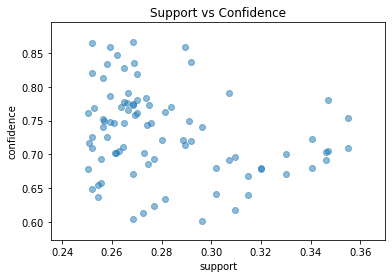

In [77]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()